In [14]:
import pandas as pd
from pandas_profiling import ProfileReport
from pycaret.datasets import get_data
#from ydata_profiling import ProfileReport


In [21]:
house_prices =pd.read_csv('../data/raw/train.csv')


## El profiling falla en mi computadora por lo que tuve que reducir el dataset.

In [16]:

# Specify the file path
file_path = '../data/raw/train.csv'

# Specify the number of rows to read (half of the dataset)
half_length = pd.read_csv(file_path).shape[0] // 2

# Read only half of the dataset
house_prices = pd.read_csv(file_path, nrows=half_length)

# Display the first few rows of the loaded DataFrame
print(house_prices.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [22]:
len(house_prices)

1460

In [ ]:
profile = ProfileReport(house_prices, title="Profile Report")
profile

In [24]:
num_filas_train = int(len(house_prices)*0.8)

data_train = house_prices.sample(n=num_filas_train,random_state=2023)
data_test = house_prices.drop(data_train.index)

In [25]:
print(f"Filas en Train:{data_train.shape[0]}")
print(f"Filas en Test:{data_test.shape[0]}")

Filas en Train:1168
Filas en Test:292


In [9]:
from pycaret.regression import *

In [26]:
dataset = setup(data=data_train,
                target='SalePrice',
                session_id=2023,#funciona como un seed
                normalize=True,
                normalize_method='minmax',
                transformation=True,
                ) #el default es yeo-johnson


,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 81)"
4,Transformed data shape,"(1168, 269)"
5,Transformed train set shape,"(817, 269)"
6,Transformed test set shape,"(351, 269)"
7,Ordinal features,6
8,Numeric features,37
9,Categorical features,43


In [27]:
dataset.X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
28,29,20,RL,47.0,16321,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal
404,405,60,RL,NaN,10364,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1273,1274,80,RL,124.0,11512,Pave,NaN,IR1,Lvl,AllPub,...,163,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal
103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
560,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,95,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
693,694,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
374,375,60,RL,65.0,8200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
40,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml


In [28]:
dataset.X_train_transformed

,Id,MSSubClass,MSZoning_RL,MSZoning_FV,MSZoning_RH,MSZoning_RM,MSZoning_C (all),LotFrontage,LotArea,Street,...,SaleType_ConLI,SaleType_Oth,SaleType_ConLw,SaleType_Con,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Abnorml,SaleCondition_AdjLand
28,0.052228,0.000000,1.0,0.0,0.0,0.0,0.0,0.210954,0.511089,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
404,0.391142,0.542989,1.0,0.0,0.0,0.0,0.0,0.341081,0.421703,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1273,0.905461,0.667362,1.0,0.0,0.0,0.0,0.0,0.553746,0.442471,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
103,0.141816,0.000000,1.0,0.0,0.0,0.0,0.0,0.444433,0.422427,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
560,0.497038,0.000000,1.0,0.0,0.0,0.0,0.0,0.341081,0.439516,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0.656380,0.830746,1.0,0.0,0.0,0.0,0.0,0.191422,0.324797,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
693,0.580938,0.213090,1.0,0.0,0.0,0.0,0.0,0.287145,0.291597,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
374,0.369568,0.542989,1.0,0.0,0.0,0.0,0.0,0.313501,0.375206,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40,0.068972,0.000000,1.0,0.0,0.0,0.0,0.0,0.402808,0.386020,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Entrenando modelos

In [29]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17381.0817,776172962.7701,26471.7719,0.8644,0.1407,0.1028,0.5030
lightgbm,Light Gradient Boosting Machine,17734.2641,867680489.5239,28396.1575,0.8484,0.1457,0.1035,0.4890
rf,Random Forest Regressor,18591.1708,899599614.0369,28730.8638,0.8439,0.1516,0.1107,0.7460
et,Extra Trees Regressor,19252.2742,958179522.1468,30007.1336,0.8379,0.1491,0.1102,0.6690
huber,Huber Regressor,18557.6892,1059547975.8728,31029.9390,0.8168,0.1568,0.1045,0.3890
llar,Lasso Least Angle Regression,20432.9596,1103101763.4377,31590.5677,0.8073,0.1766,0.1226,0.3580
br,Bayesian Ridge,20426.9129,1128373619.1916,32155.5015,0.8037,0.1664,0.1178,0.3500
ridge,Ridge Regression,21073.9104,1211541942.6200,33139.9404,0.7867,0.2183,0.1243,0.3530
par,Passive Aggressive Regressor,20522.6470,1157511631.1709,33169.8151,0.8040,0.1519,0.1122,0.4850
ada,AdaBoost Regressor,23893.7975,1171094942.9668,33534.8575,0.7981,0.1904,0.1520,0.4400


Los primeros tres modelos ganadores son gbr/lightgbm/random forest regressor

In [ ]:
top3_models = compare_models(sort='RMSE', n_select=3)


Modelo: GradientBoostingRegressor(random_state=2023)


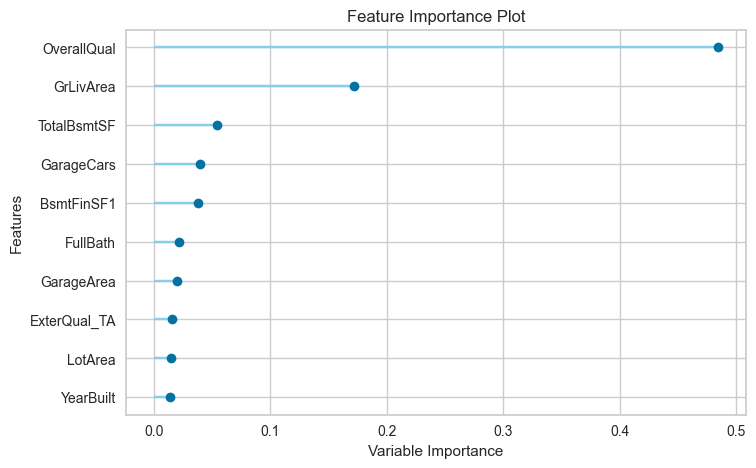


Modelo: LGBMRegressor(n_jobs=-1, random_state=2023)


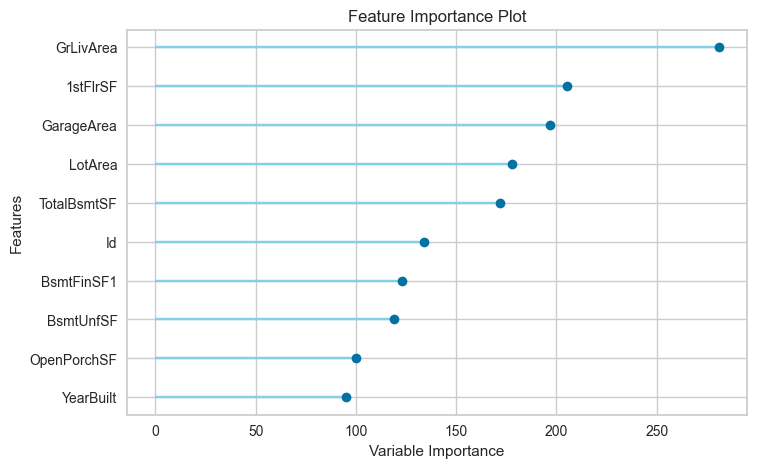


Modelo: RandomForestRegressor(n_jobs=-1, random_state=2023)


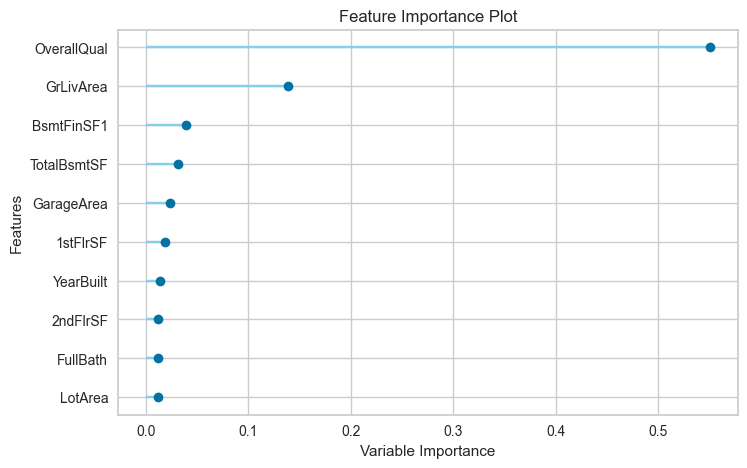

In [38]:
for model in top3_models:
    print(f"\nModelo: {model}")
    plot_model(model, plot='feature')

In [41]:
for model in top3_models:
    print(f"\nOptimizando hiperparámetros para el modelo: {model}")
    
    # Utiliza la función tune_model para optimizar los hiperparámetros
    tuned_model = tune_model(model)
    
    print(f"Mejores hiperparámetros:\n{tuned_model.get_params()}")


Optimizando hiperparámetros para el modelo: GradientBoostingRegressor(random_state=2023)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25519.1181,3004347544.6854,54811.9289,0.4088,0.2444,0.1677
1,16601.2163,684922573.3131,26171.0255,0.9116,0.1196,0.0898
2,23305.7560,1523529343.3462,39032.4140,0.8257,0.1497,0.1120
3,18625.0671,727444857.0159,26971.1857,0.8667,0.1538,0.1028
4,17689.4088,641000152.9635,25317.9808,0.8750,0.1310,0.0941
5,15848.2961,451109782.7277,21239.3452,0.9025,0.1586,0.1114
6,17608.0161,611630767.3993,24731.1700,0.8924,0.1410,0.1068
7,13268.8108,345416406.6981,18585.3815,0.9395,0.1305,0.0893
8,17281.8774,488490232.9912,22101.8152,0.9137,0.1222,0.0994


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Mejores hiperparámetros:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 2023, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Optimizando hiperparámetros para el modelo: LGBMRegressor(n_jobs=-1, random_state=2023)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25589.7744,2865607692.2300,53531.3711,0.4361,0.2393,0.1616
1,16084.2408,703028601.2201,26514.6865,0.9093,0.1072,0.0819
2,20248.4679,1021116610.9321,31954.9153,0.8832,0.1304,0.1022
3,19446.0468,816074758.9658,28567.0222,0.8505,0.1445,0.1046
4,18482.8672,687251088.0041,26215.4742,0.8660,0.1309,0.0989
5,16884.2650,646925242.3326,25434.7251,0.8602,0.1759,0.1241
6,16018.2915,515633233.3683,22707.5589,0.9093,0.1315,0.0988
7,15608.8690,500652759.8095,22375.2712,0.9123,0.1364,0.1008
8,16170.4795,472249355.4712,21731.2990,0.9166,0.1294,0.0967


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Mejores hiperparámetros:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 2023, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}

Optimizando hiperparámetros para el modelo: RandomForestRegressor(n_jobs=-1, random_state=2023)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27027.8503,2373006073.6663,48713.5102,0.5330,0.2432,0.1721
1,20075.1099,1254392309.4893,35417.4012,0.8382,0.1582,0.1126
2,24958.9972,1817549936.8666,42632.7332,0.7920,0.1645,0.1247
3,19734.7333,930804155.8716,30509.0832,0.8295,0.1493,0.1131
4,19726.4633,923800799.2913,30394.0915,0.8198,0.1441,0.0996
5,19030.7906,866547703.6149,29437.1823,0.8127,0.1984,0.1448
6,18726.7877,706455712.8323,26579.2346,0.8757,0.1714,0.1253
7,18986.9813,1094721799.3733,33086.5804,0.8081,0.1821,0.1271
8,19999.4259,649287307.6828,25481.1167,0.8853,0.1632,0.1277


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Mejores hiperparámetros:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False}


Nota: para los 3 modelos, el comentario es que el modelo original es mejor que el calculado utilizando la función tuned_model.

In [42]:
best = compare_models(sort='RMSE')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:41:36
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17381.0817,776172962.7701,26471.7719,0.8644,0.1407,0.1028,0.5790
lightgbm,Light Gradient Boosting Machine,17734.2641,867680489.5239,28396.1575,0.8484,0.1457,0.1035,0.5460
rf,Random Forest Regressor,18591.1708,899599614.0369,28730.8638,0.8439,0.1516,0.1107,0.8450
et,Extra Trees Regressor,19252.2742,958179522.1468,30007.1336,0.8379,0.1491,0.1102,0.7110
huber,Huber Regressor,18557.6892,1059547975.8728,31029.9390,0.8168,0.1568,0.1045,0.4180
llar,Lasso Least Angle Regression,20432.9596,1103101763.4377,31590.5677,0.8073,0.1766,0.1226,0.4090
br,Bayesian Ridge,20426.9129,1128373619.1916,32155.5015,0.8037,0.1664,0.1178,0.4120
ridge,Ridge Regression,21073.9104,1211541942.6200,33139.9404,0.7867,0.2183,0.1243,0.3870
par,Passive Aggressive Regressor,20522.6470,1157511631.1709,33169.8151,0.8040,0.1519,0.1122,0.5640
ada,AdaBoost Regressor,23893.7975,1171094942.9668,33534.8575,0.7981,0.1904,0.1520,0.4730


In [43]:
final_model = finalize_model(estimator=best)

In [44]:
save_model(model=final_model, model_name='../models/model_v2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'Hal...
                                                                     'Heating',
                                                                     'HeatingQC',
                   

In [45]:
model = load_model('../models/model_v2')

Transformation Pipeline and Model Successfully Loaded


In [46]:
model

Pipeline(memory=FastMemory(location=C:\Users\JEYxc\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                             'LotArea', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             'BsmtFinSF1', 'BsmtFinSF2',
                                             'BsmtUnfSF', 'TotalBsmtSF',
                                             '1stFlrSF', '2ndFlrSF',
                                             'LowQualFinSF', 'GrLivArea',
                                             'Bsmt...
                                                                    'Heating',
                                                                    'HeatingQC',
                                                                    'Electrical',
                                                                    'KitchenQual',
                                                                    'Functional',
                                                                    'FireplaceQu',
                                                                    'GarageType', ...],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=2023))])

In [47]:
predicciones = predict_model(model, data=data_test)
predicciones

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15345.0996,505604820.1460,22485.6581,0.9150,0.1251,0.0930


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,156163.991358
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400,145706.694925
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,306000,308840.129772
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,68500,71714.781099
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350,137154.831759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2007,WD,Normal,240000,270845.937156
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000,103125.916652
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,New,Partial,287090,262221.502120
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,168762.614376


1. **MAE**
   - Mide la magnitud promedio de los errores absolutos entre las predicciones y los valores reales, un MAE de 15345.0996 significa que en promedio, las predicciones del modelo están desviadas por aproximadamente 15,345 unidades de la variable objetivo (SalePrice).

2. **MSE**
   - Calcula el promedio de los errores al cuadrado, dando mayor prioridad a los errores más grandes, un valor de 505604820.1460 indica que hay una variabilidad considerable en los errores cuadráticos entre las predicciones y los valores reales.

3. **RMSE**
   - Es la medida de la dispersión de los errores, un RMSE de 22485.6581 significa que, en promedio, las predicciones difieren significativamente de la variable objetivo.

4. **R2:**
   - Indica una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes, un R2 de 0.9150 indica que el modelo explica el 91.5% de la variabilidad en la variable objetivo.

5. **RMSLE:**
   - Mide la precisión de las predicciones logarítmicas, siendo menos sensible a los errores en predicciones de valores más grandes, un valor de 0.1251, indica que el modelo tiene un buen rendimiento en la predicción de valores logarítmicos.

6. **MAPE:**
   - Indica el promedio porcentual de la diferencia absoluta entre las predicciones y los valores reales, un valor de 0.0930 indica que, en promedio, las predicciones del modelo tienen un error del 9.3% en relación con los valores reales.
